# Import & Review Data

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns

plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
file = './data/trumptwitterarchive.csv'


In [3]:
trumptweets = pd.read_csv(file, encoding = 'latin1',
                          index_col='created_at')

# Prepare Data for Analysis

In [4]:
#Cast index of created_at dates to datetime format

trumptweets.index = pd.to_datetime(trumptweets.index)

In [5]:
#add new column for HOUR when the tweet occurred

trumptweets.loc[:, 'tweet_hour'] = trumptweets.index.hour

In [6]:
# Convert Source column to dummy variables

#map source twitter for iphone, Media Studio, Twitter for iPad to integers

trumptweets.loc[:, 'source_num'] = trumptweets.loc[:,'source'].map({'Twitter for iPhone':0,
                                                                    'Media Studio':1,
                                                                    'Twitter for iPad':2})

In [23]:
trumptweets.loc[:, 'source_num'].unique()

array([0, 1, 2])

In [24]:
trumptweets_dummysource  = pd.get_dummies(trumptweets, columns=['source_num']).drop('source_num_0', axis=1)
trumptweets_dummysource

,source,text,retweet_count,favorite_count,is_retweet,id_str,tweet_hour,source_num_1,source_num_2
created_at,,,,,,,,,
2018-02-13 10:52:00,Twitter for iPhone,Negotiations on DACA have begun. Republicans w...,19802,86897,False,963365328716812288,10,0,0
2018-02-13 10:43:00,Twitter for iPhone,Our infrastructure plan has been put forward a...,21457,96494,False,963362959463469058,10,0,0
2018-02-12 20:48:00,Twitter for iPhone,The journey to #MAGA began @CPAC 2011 and the ...,13647,62775,False,963152799486828544,20,0,0
2018-02-12 12:54:00,Twitter for iPhone,Thank you to Sue Kruczek who lost her wonderfu...,16333,82446,False,963033580107653120,12,0,0
2018-02-12 12:46:00,Twitter for iPhone,This will be a big week for Infrastructure. Af...,29430,132369,False,963031666150313984,12,0,0
2018-02-11 20:36:00,Twitter for iPhone,Just spoke to @JohnKasich to express condolenc...,14563,74041,False,962787355932360706,20,0,0
2018-02-11 20:26:00,Twitter for iPhone,Rep. Lou Barletta a Great Republican from Penn...,23532,93637,False,962784821389996033,20,0,0
2018-02-11 19:15:00,Twitter for iPhone,4.2 million hard working Americans have alread...,24618,120619,False,962767075457593344,19,0,0
2018-02-11 18:21:00,Twitter for iPhone,So many positive things going on for the U.S.A...,30615,120190,False,962753552824365056,18,0,0


In [ ]:
trumptweets.loc

In [39]:
trumptweets_dummysource.rename(columns={'source_num_1': 'src_media_studio', 'source_num_2': 'src_iPad'}, inplace=True)

In [25]:
trumptweets_dummysource.shape

(63, 9)

In [40]:
#describe all

trumptweets_dummysource.describe(include='all')

,source,text,retweet_count,favorite_count,is_retweet,id_str,tweet_hour,src_media_studio,src_iPad
count,63,63,63.000000,63.000000,63,6.300000e+01,63.000000,63.000000,63.000000
unique,3,63,NaN,NaN,2,NaN,NaN,NaN,NaN
top,Twitter for iPhone,Jobless claims have dropped to a 45 year low!,NaN,NaN,False,NaN,NaN,NaN,NaN
freq,54,1,NaN,NaN,61,NaN,NaN,NaN,NaN
mean,NaN,NaN,26942.761905,110733.000000,NaN,9.611759e+17,13.936508,0.063492,0.079365
std,NaN,NaN,8899.577365,36848.728581,NaN,1.245250e+15,5.961903,0.245805,0.272479
min,NaN,NaN,12320.000000,0.000000,NaN,9.590294e+17,0.000000,0.000000,0.000000
25%,NaN,NaN,20694.000000,88724.000000,NaN,9.600744e+17,12.000000,0.000000,0.000000
50%,NaN,NaN,27612.000000,109273.000000,NaN,9.612532e+17,14.000000,0.000000,0.000000
75%,NaN,NaN,32501.000000,132925.500000,NaN,9.623379e+17,18.000000,0.000000,0.000000


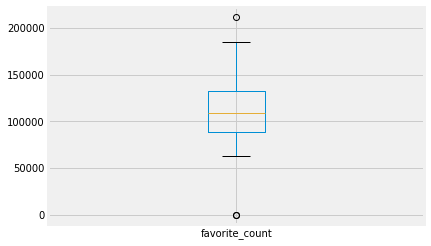

In [29]:
#boxplot of favorite_count

trumptweets_dummysource.loc[:,'favorite_count'].plot(kind='box')

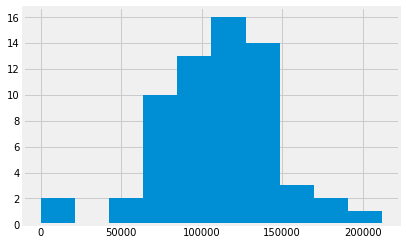

In [30]:
#Histogram of favorite count

trumptweets_dummysource.loc[:, 'favorite_count'].hist(bins=10)

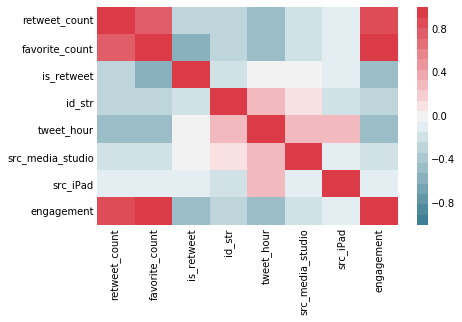

In [51]:
#Insert Correlation Matrix with HeatMap

sns.heatmap(trumptweets_dummysource.corr(),
            vmin=-1,
            vmax = 1,
            cmap = sns.diverging_palette(220, 10, n=21),
            );

# Linear Regression

In [43]:
#Create new column, engagement, that summs retweet and favorite counts.  This will become my target y

trumptweets_dummysource.loc[:, 'engagement'] = trumptweets_dummysource.loc[:, 'retweet_count'] + trumptweets_dummysource.loc[:, 'favorite_count']

In [60]:
feature_cols = ['is_retweet', 
                'tweet_hour', 
                'src_media_studio', 
                'src_iPad']

In [61]:
X = trumptweets_dummysource.loc[:, feature_cols]
y = trumptweets.loc[:, 'engagement']


In [62]:
lr = LinearRegression()
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [65]:
print(lr.intercept_)
print(lr.coef_)

190600.206803
[-134441.93924522   -3355.7898121   -18829.67329536   -8730.8003726 ]
